In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_42942_G')

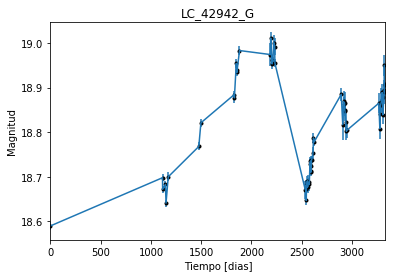

In [2]:
data = np.genfromtxt('LC_42942_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_42942_G')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

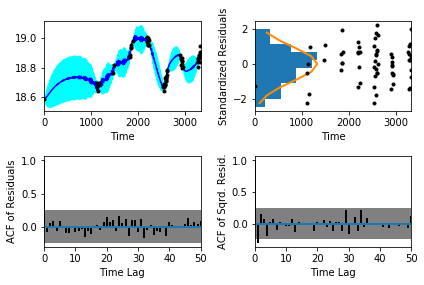

In [5]:
sample.assess_fit()

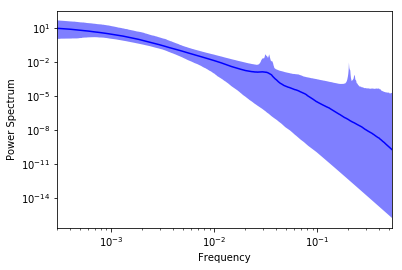

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_42942_G')

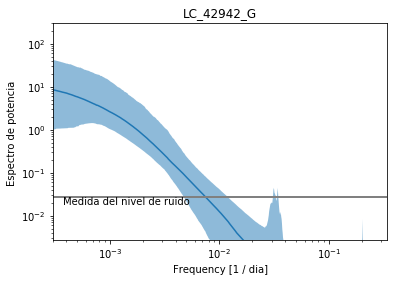

In [10]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_42942_G')

Text(0.5,1,'Prediccion , valor esperado LC_42942_G')

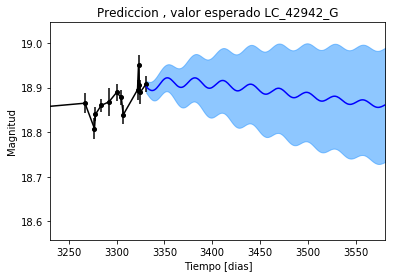

In [11]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_42942_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_42942_G')

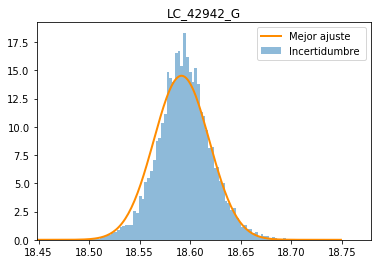

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_42942_G')

Text(0.5,1,'Interpolacion, camino simulado LC_42942_G')

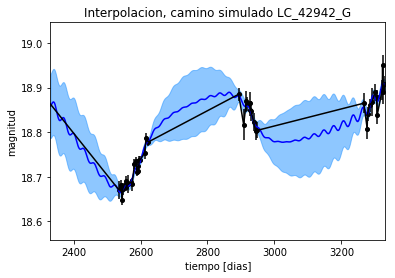

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_42942_G')

Text(0.5,1,'Interpolacion, camino simulado LC_42942_G')

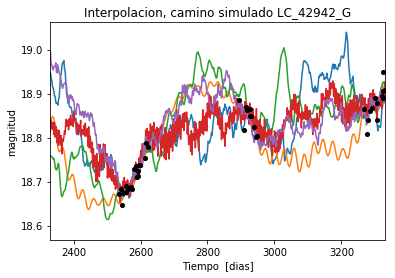

In [14]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_42942_G')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 648.100140787
Median: 0.00176299347011
Standard deviation: 0.144954363025
68% credibility interval: [ 0.00040397  0.07772243]
95% credibility interval: [  3.11319991e-04   5.66520102e-01]
99% credibility interval: [  3.03746635e-04   9.32553203e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1275.24989088
Median: 0.00109934710664
Standard deviation: 0.0823228273514
68% credibility interval: [ 0.00038807  0.03412851]
95% credibility interval: [ 0.00031132  0.27047795]
99% credibility interval: [  3.03746635e-04   5.68861814e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 266.820702401
Median: 0.0129277169465
Standard

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 396.503005734
Median: 160.199001421
Standard deviation: 3.0530809716
68% credibility interval: [ 157.06810555  163.6635489 ]
95% credibility interval: [ 154.48892301  165.782182  ]
99% credibility interval: [ 152.15453594  166.07493955]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 780.542312803
Median: 0.181643410115
Standard deviation: 1.93614742877
68% credibility interval: [ 0.02537082  2.37412713]
95% credibility interval: [ 0.01133676  7.0155833 ]
99% credibility interval: [ 0.00985289  9.65046426]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 206.911281368
Median: 1.57355351302
Standard deviation: 11.5754613899
68% credibility interval: [  0.04015963  16.65493645]
95% credibility interval: [  3.59726159e-

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 10296.9580763
Median: 3.28895342337e-25
Standard deviation: 2.62261151346e+140
68% credibility interval: [  1.69032310e-82   2.61530487e-02]
95% credibility interval: [  9.34719041e-98   2.60291867e+15]
99% credibility interval: [  8.17761215e-129   1.49927265e+055]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 815.638491973
Median: 18.7945314895
Standard deviation: 0.0733147926716
68% credibility interval: [ 18.72750013  18.8560403 ]
95% credibility interval: [ 18.6624454   18.93666271]
99% credibility interval: [ 18.5715846   19.05006464]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 124.195935102
Median: 0.0701780470702
Standard deviation: 0.295068282526
68% credibility interval: [ 0.00493708  0.61044346]
95% credibility interval: [ 0.          0.97553097]
99% credibility interval: [ 0.          1.04161256]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 124.195935102
Median: 0.0701780470702
Standard deviation: 0.295068282526
68% credibility interval: [ 0.00493708  0.61044346]
95% credibility interval: [ 0.          0.97553097]
99% credibility interval: [ 0.          1.04161256]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 448.847567684
Median: 0.0
Standard deviation: 0.000585295687505
68% cr

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 396.503005734
Median: 160.199001421
Standard deviation: 3.0530809716
68% credibility interval: [ 157.06810555  163.6635489 ]
95% credibility interval: [ 154.48892301  165.782182  ]
99% credibility interval: [ 152.15453594  166.07493955]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1032.02028997
Median: 0.019327901857
Standard deviation: 0.0264666456476
68% credibility interval: [ 0.01202593  0.03665351]
95% credibility interval: [ 0.00816263  0.0786762 ]
99% credibility interval: [ 0.0065463   0.14755424]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 897.557686192
Median: 1.14703363385
Standard deviation: 0.258068989548
68% credibility interval: [ 0.91546789  1.44731045]
95% credibility interval: [ 0.74635073  1.74753265]
99% credibility interval: [ 0.69056908  1.90884389]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 314.545121339
Median: 0.000576289834129
Standard deviation: 0.196041556616
68% credibility interval: [  9.10091647e-06   5.05473216e-02]
95% credibility interval: [  4.03923340e-17   4.37239946e-01]
99% credibility interval: [  4.57679946e-58   1.45358462e+00]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 648.100140787
Median: (-0.0110772146681-0.0237420008551j)
Standard deviation: 2.06560191163
68% credibility interval: [-0.48834440-6.31447312j -0.00253821-0.19338721j]
95% credibility interval: [ -3.55955078e+00+0.j          -1.95608119e-03-4.87727605j]
99% credibility interval: [ -5.85940459e+00-3.19508947j  -1.90849640e-03-1.31088922j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1275.24989088
Median: (-0.00690740158792+0.0943490738122j)
Standard deviation: 1.92477194964
68% credibility interval: [-0.21443577+5.87703671j -0.00243834+1.44201446j]
95% credibility interval: [-1.69946307+5.4484272j  -0.00195608+4.87727605j]
99% credibility interval: [ -3.57426419e+00+3.75742869j  -1.90849640e-03+1.31088922j]
Posterior